In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

#loading datasets
dataset1 = np.load('hw2_material/hac/dataset1.npy')
dataset2 = np.load('hw2_material/hac/dataset2.npy') 
dataset3 = np.load('hw2_material/hac/dataset3.npy')
dataset4 = np.load('hw2_material/hac/dataset4.npy')

In [2]:
def single_linkage(c1, c2):
    """
    Given clusters c1 and c2, calculates the single linkage criterion.
    :param c1: An (N, D) shaped numpy array containing the data points in cluster c1.
    :param c2: An (M, D) shaped numpy array containing the data points in cluster c2.
    :return: A float. The result of the calculation.
    """
 
    distances = np.empty(0) #array for distances of 1 custer to all other clusters
    s_distances = np.empty(0) #array for storing the smallest distances from each clusters distances to other clusters
    
    for data in c1:
        for data2 in c2:
            a, b = data
            c, d = data2
        
            distance = math.sqrt(pow(a-c, 2) + pow(b-d, 2))  #calculating euclidean distance
            distances = np.append(distances, distance)      
        
        
        smallest_distance = distances[0]
    
        for distance in distances:
            if(distance < smallest_distance):
                smallest_distance = distance
                
        s_distances = np.append(s_distances, smallest_distance)
        distances = np.empty(0)
        
    smallest_distance_final = s_distances[0]
        
    for distance in s_distances:      #finding the overall smallest distance between any 2 clusters
        if(distance < smallest_distance_final):
            smallest_distance_final = distance
            
    return smallest_distance_final
    

In [3]:
def complete_linkage(c1, c2):
    """
    Given clusters c1 and c2, calculates the complete linkage criterion.
    :param c1: An (N, D) shaped numpy array containing the data points in cluster c1.
    :param c2: An (M, D) shaped numpy array containing the data points in cluster c2.
    :return: A float. The result of the calculation.
    """
    
    distances = np.empty(0)   #array for distances of 1 custer to all other clusters
    l_distances = np.empty(0)  #array for storing the largest distances from each clusters distances to other clusters
    
    for data in c1:
        for data2 in c2:
            a, b = data
            c, d = data2
        
            distance = math.sqrt(pow(a-c, 2) + pow(b-d, 2))   #calculating euclidean distance
            distances = np.append(distances, distance)
        
        
        largest_distance = distances[0]
    
        for distance in distances:
            if(distance > largest_distance):
                largest_distance = distance
                
        l_distances = np.append(l_distances, largest_distance)
        distances = np.empty(0)
        
    largest_distance_final = l_distances[0]
        
    for distance in l_distances:      #finding the overall largest distance between any 2 clusters
        if(distance > largest_distance_final):
            largest_distance_final = distance
            
    return largest_distance_final
    

In [4]:
def average_linkage(c1, c2):
    """
    Given clusters c1 and c2, calculates the average linkage criterion.
    :param c1: An (N, D) shaped numpy array containing the data points in cluster c1.
    :param c2: An (M, D) shaped numpy array containing the data points in cluster c2.
    :return: A float. The result of the calculation.
    """
    
    distance_sum = 0    #sum of all distances
    distance_count = 0   #totl distances calculated
    
    for data in c1:
        for data2 in c2:
            a, b = data
            c, d = data2
        
            distance_sum += math.sqrt(pow(a-c, 2) + pow(b-d, 2))  #clculating euclidean distance
            distance_count += 1
            
    average = distance_sum/distance_count   #getting average distance
    
    return average
    

In [5]:
def centroid_linkage(c1, c2):
    """
    Given clusters c1 and c2, calculates the centroid linkage criterion.
    :param c1: An (N, D) shaped numpy array containing the data points in cluster c1.
    :param c2: An (M, D) shaped numpy array containing the data points in cluster c2.
    :return: A float. The result of the calculation.
    """
    
    centroid_1_x = 0
    centroid_1_y = 0
    centroid_2_x = 0
    centroid_2_y = 0
    
    i=0
    for data in c1:    #getting cluster 1 centroid value
        centroid_1_x += data[0]
        centroid_1_y += data[1]
        i+=1
        
    
    j=0    
    for data in c2:    #getting cluster 2 centroid value
        centroid_2_x += data[0]
        centroid_2_y += data[1]
        j+=1
        
    centroid_1_x = centroid_1_x/(i)   
    centroid_1_y = centroid_1_y/(i)
    centroid_2_x = centroid_2_x/(j)
    centroid_2_y = centroid_2_y/(j)
    
    #distance between centroids
    distance = math.sqrt(pow(centroid_1_x-centroid_2_x, 2) + pow(centroid_1_y-centroid_2_y, 2))  
    
    return distance
    

In [6]:
def hac(data, criterion, stop_length):
    """
    Applies hierarchical agglomerative clustering algorithm with the given criterion on the data
    until the number of clusters reaches the stop_length.
    :param data: An (N, D) shaped numpy array containing all of the data points.
    :param criterion: A function. It can be single_linkage, complete_linkage, average_linkage, or
    centroid_linkage
    :param stop_length: An integer. The length at which the algorithm stops.
    :return: A list of numpy arrays with length stop_length. Each item in the list is a cluster
    and a (Ni, D) sized numpy array.
    """
    
    no_of_clusters = data.size//2   #considering each datapoint as a cluster initially, we have as many clusters as datapoints
    clusters = []
    for d in data:
        clusters.append([d])  #adding each data point to clusters list as an array of its own
        
    min_distance = criterion(clusters[0],clusters[1])
    cl1 = 0
    cl2 = 1
    
    i=0
    j=0
    
    while no_of_clusters != stop_length:  
        #print(no_of_clusters)
        for cluster in clusters:  #iterating through the clusters
            for cluster2 in clusters: #iterating through the clusters for each cluster
                if(i != j):  #making sure distance with self is not considered otherwise it will always be the smallest distance
                    distance = criterion(cluster,cluster2)
                    if(distance < min_distance):
                        min_distance = distance
                        cl1 = i
                        cl2 = j
                j+=1
            j=0
            i+=1
        temp = np.empty(0)     #making a temporary numpy array of newformed cluster
        temp = np.append(temp, clusters[cl1])
        temp = np.append(temp, clusters[cl2])
        temp = temp.reshape(temp.size//2,2)
        del clusters[cl1]   #removing old clusters from the array
        del clusters[cl2-1]
        clusters.append(temp)  #adding new cluster to the array
        no_of_clusters -=1
        min_distance = criterion(clusters[0],clusters[1])
        cl1 = 0
        cl2 = 1
        i=0
        j=0
        
    return clusters

In [7]:
linkage_criterions = [single_linkage, complete_linkage, average_linkage, centroid_linkage]
colors_defs = ['#DF2020', '#81DF20', '#1224C7', '#D117B5']

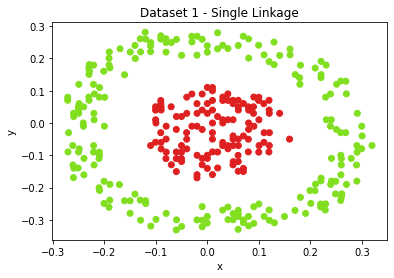

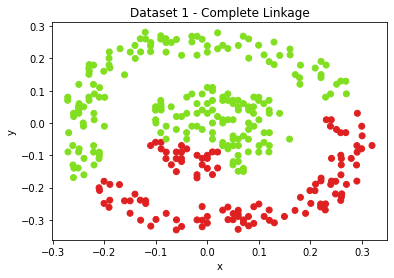

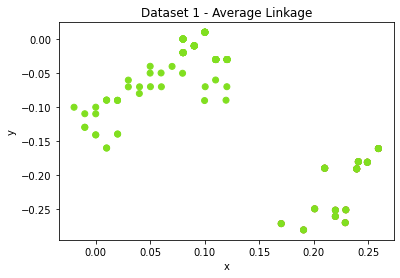

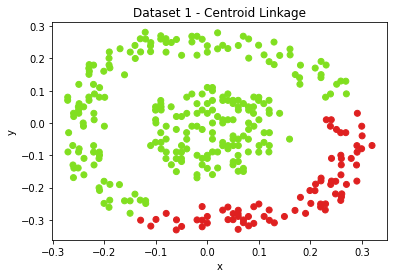

In [29]:
#for dataset 1
j=0
for criterion in linkage_criterions:
    resulting_clusters = hac(dataset1, criterion, 2)
    
    x_vals = np.empty(0)
    y_vals = np.empty(0)
    colors = np.empty(0)
    i=0
    for cluster in resulting_clusters:
        for val in cluster:
            a, b = val
            x_vals = np.append(x_vals, a)
            y_vals = np.append(y_vals, b)
            colors = np.append(colors, colors_defs[i])
        i+=1
    plt.scatter(x_vals, y_vals, c=colors)
    plt.xlabel('x')
    plt.ylabel('y')
    if(j==0):
        plt.title('Dataset 1 - Single Linkage')
    if(j==1):
        plt.title('Dataset 1 - Complete Linkage')
    if(j==2):
        plt.title('Dataset 1 - Average Linkage')
    if(j==3):
        plt.title('Dataset 1 - Centroid Linkage')
    plt.show()
    j+=1

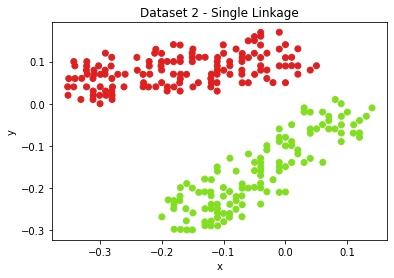

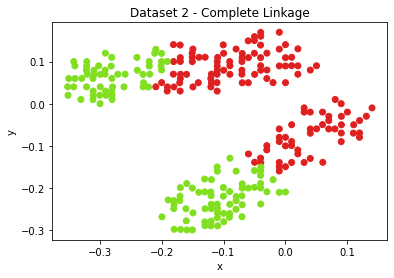

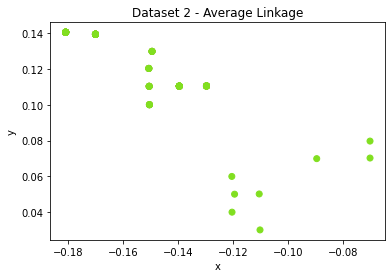

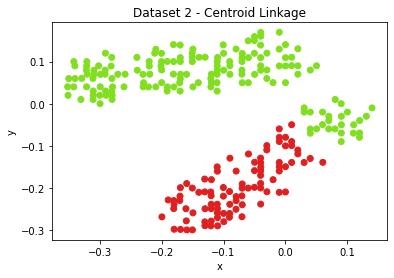

In [30]:
#for dataset 2
j=0
for criterion in linkage_criterions:
    resulting_clusters = hac(dataset2, criterion, 2)
    
    x_vals = np.empty(0)
    y_vals = np.empty(0)
    colors = np.empty(0)
    i=0
    for cluster in resulting_clusters:
        for val in cluster:
            a, b = val
            x_vals = np.append(x_vals, a)
            y_vals = np.append(y_vals, b)
            colors = np.append(colors, colors_defs[i])
        i+=1
    plt.scatter(x_vals, y_vals, c=colors)
    plt.xlabel('x')
    plt.ylabel('y')
    if(j==0):
        plt.title('Dataset 2 - Single Linkage')
    if(j==1):
        plt.title('Dataset 2 - Complete Linkage')
    if(j==2):
        plt.title('Dataset 2 - Average Linkage')
    if(j==3):
        plt.title('Dataset 2 - Centroid Linkage')
    plt.show()
    j+=1

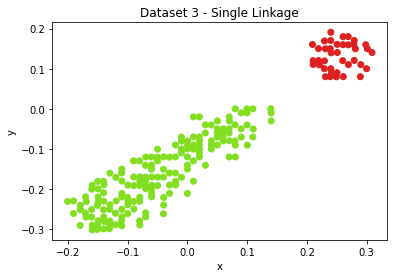

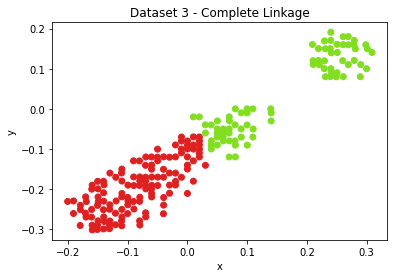

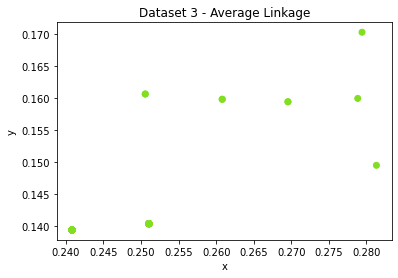

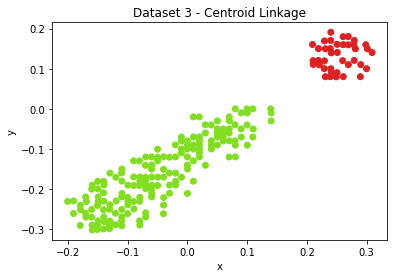

In [31]:
#for dataset 3
j=0
for criterion in linkage_criterions:
    resulting_clusters = hac(dataset3, criterion, 2)
    
    x_vals = np.empty(0)
    y_vals = np.empty(0)
    colors = np.empty(0)
    i=0
    for cluster in resulting_clusters:
        for val in cluster:
            a, b = val
            x_vals = np.append(x_vals, a)
            y_vals = np.append(y_vals, b)
            colors = np.append(colors, colors_defs[i])
        i+=1
    plt.scatter(x_vals, y_vals, c=colors)
    plt.xlabel('x')
    plt.ylabel('y')
    if(j==0):
        plt.title('Dataset 3 - Single Linkage')
    if(j==1):
        plt.title('Dataset 3 - Complete Linkage')
    if(j==2):
        plt.title('Dataset 3 - Average Linkage')
    if(j==3):
        plt.title('Dataset 3 - Centroid Linkage')
    plt.show()
    j+=1

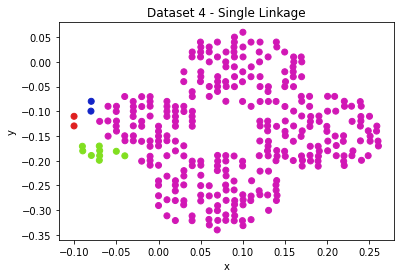

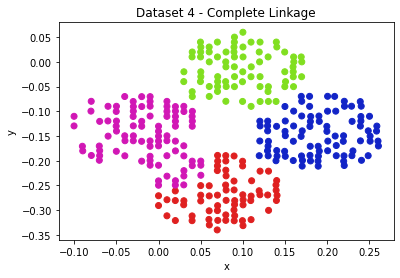

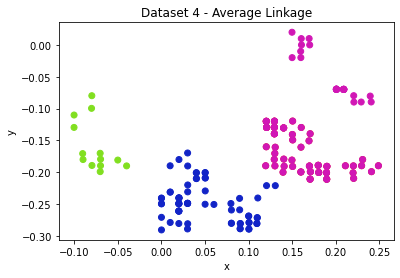

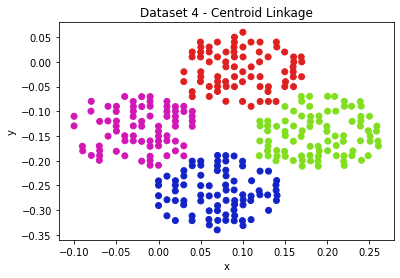

In [17]:
#for dataset 4
j=0
for criterion in linkage_criterions:
    resulting_clusters = hac(dataset4, criterion, 4)
    
    x_vals = np.empty(0)
    y_vals = np.empty(0)
    colors = np.empty(0)
    i=0
    for cluster in resulting_clusters:
        for val in cluster:
            a, b = val
            x_vals = np.append(x_vals, a)
            y_vals = np.append(y_vals, b)
            colors = np.append(colors, colors_defs[i])
        i+=1
    plt.scatter(x_vals, y_vals, c=colors)
    plt.xlabel('x')
    plt.ylabel('y')
    if(j==0):
        plt.title('Dataset 4 - Single Linkage')
    if(j==1):
        plt.title('Dataset 4 - Complete Linkage')
    if(j==2):
        plt.title('Dataset 4 - Average Linkage')
    if(j==3):
        plt.title('Dataset 4 - Centroid Linkage')
    plt.show()
    j+=1